In [2]:
! pip install tensorflow stable-baselines gym-anytrading gym

In [10]:
! pip install tensorflow==2.8.0rc0

In [11]:
! pip install stable-baselines3

In [12]:
# bring in marketwatch gme data

In [1]:
!pip uninstall gym gymnasium
!pip uninstall gym-anytrading
!pip install gym==0.23.0
!pip install gym-anytrading

Found existing installation: gym-anytrading 2.0.0
Uninstalling gym-anytrading-2.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gym_anytrading-2.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gym_anytrading/*
Proceed (Y/n)? y
  Successfully uninstalled gym-anytrading-2.0.0
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
Requested gym==0.21.0 from https://files.pythonhosted.org/packages/4b/48/920cea66177b865663fde5a9390a59de0ef3b642ad98106ac1d8717d7005/gym-0.21.0.tar.gz has invalid metadata: Expected end or semicolon (after version specifier)
    opencv-python>=3.
                 ~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement gym==0.21.0 (from versions: 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.1.4, 0.1.5, 0.1.6, 0.1.7, 0.2.0, 0.2.1, 0.2.2, 0.2.3, 0.2.4, 0.2.5, 0.2.6, 0.2.7, 0.2.8, 0.2.9, 0.2.10, 0.2.11, 0.2.12, 0.3.0, 

In [3]:
! pip install gym

  Using cached gym-0.26.2-py3-none-any.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [4]:
import gym
import gym_anytrading

In [5]:
# stable baselines for reinforcement learning
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("gme_data.csv")

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume
0,09/05/2024,22.00,22.68,21.66,22.39,"5,101,162"
1,09/04/2024,22.85,23.71,22.11,22.12,"6,700,878"
2,09/03/2024,24.15,24.69,22.82,23.14,"11,335,400"
3,08/30/2024,21.82,23.48,21.73,23.42,"15,680,720"
4,08/29/2024,20.50,22.45,20.47,21.51,"10,428,350"


In [9]:
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Volume,object


In [10]:
data.set_index("Date", inplace=True)

In [11]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-05,22.00,22.68,21.66,22.39,"5,101,162"
2024-09-04,22.85,23.71,22.11,22.12,"6,700,878"
2024-09-03,24.15,24.69,22.82,23.14,"11,335,400"
2024-08-30,21.82,23.48,21.73,23.42,"15,680,720"
2024-08-29,20.50,22.45,20.47,21.51,"10,428,350"


In [32]:
# List all registered environments
for key in gymnasium.envs.registry.keys():
  if "stocks" in key.lower():
    print(key)

stocks-v0


In [17]:
import gymnasium

In [22]:
#
# Create Dummy Environment
env = gymnasium.make("stocks-v0", df=data, frame_bound=(5, 100), window_size=5)

In [23]:
env.prices

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.prices to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.prices` for environment variables or `env.get_wrapper_attr('prices')` that will search the reminding wrappers.
  logger.warn(


array([22.39, 22.12, 23.14, 23.42, 21.51, 19.9 , 20.74, 21.36, 22.21,
       22.12, 22.55, 22.28, 22.66, 22.4 , 22.53, 21.99, 22.27, 21.88,
       21.93, 21.75, 20.83, 21.28], dtype=float32)

In [24]:
env.signal_features

array([[22.39,  0.  ],
       [22.12, -0.27],
       [23.14,  1.02],
       [23.42,  0.28],
       [21.51, -1.91],
       [19.9 , -1.61],
       [20.74,  0.84],
       [21.36,  0.62],
       [22.21,  0.85],
       [22.12, -0.09],
       [22.55,  0.43],
       [22.28, -0.27],
       [22.66,  0.38],
       [22.4 , -0.26],
       [22.53,  0.13],
       [21.99, -0.54],
       [22.27,  0.28],
       [21.88, -0.39],
       [21.93,  0.05],
       [21.75, -0.18],
       [20.83, -0.92],
       [21.28,  0.45]], dtype=float32)

In [29]:
env.action_space

Discrete(2)

Info {'total_reward': 1.3800010681152344, 'total_profit': 1.001473254231159, 'position': <Positions.Long: 1>}


/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


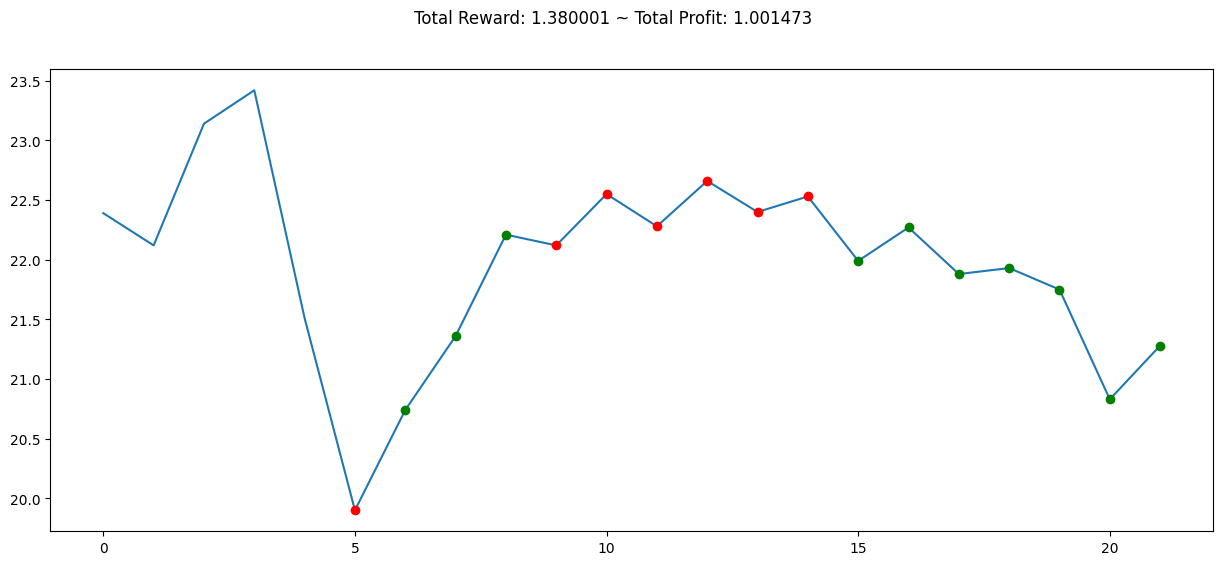

In [27]:
state = env.reset()
while True:
  # taking random steps from action space : Buy or Sell
  action = env.action_space.sample()
  n_state, reward, done, truncated, info = env.step(action)

  if done or truncated:
    print("Info",info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [30]:
# Build Environment and Train
env_maker = lambda: gymnasium.make('stocks-v0', df=data, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [34]:
# A2C Algorithm : Deep Neural Network with LSTM layer
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 484      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.65    |
|    explained_variance | 0.501    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.00374 |
|    value_loss         | 0.000106 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 518      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.643   |
|    explained_variance | 0.284    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.14     |
|    value_loss      

In [ ]:
# Explained Variance 0.945
# Near to 1 is a reasonably well performing model

In [37]:
# Evaluation
env = gymnasium.make('stocks-v0',df=data,frame_bound=(10,20), window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print("Info", info)
    break

TypeError: tuple indices must be integers or slices, not tuple

In [40]:
# Initialize the environment
env = gymnasium.make('stocks-v0', df=data, frame_bound=(10, 20), window_size=5)
obs, info = env.reset()  # Unpack the observation and additional info

while True:
    obs = obs[np.newaxis, ...]  # Add a new axis to the observation array
    # Make the model predict whether to buy or sell
    action, _states = model.predict(obs)
    # Step through the environment
    obs, reward, done, truncated, info = env.step(action)  # Adjust unpacking based on the step return values

    # Break if the episode ends
    if done or truncated:
        print("Info",info)
        break


Info {'total_reward': 0.5100002288818359, 'total_profit': 0.9670897030341746, 'position': <Positions.Long: 1>}
